# CSE4502: Assignment 2


## NAME: Arianna Azizi


**Due**: Sunday, April 21, 11:59 PM

**Total Points**: 100


**How to submit**: Create a zip folder named "Assignment2_your name". Include the `.ipynb` file with your answers PLUS its `.html` file as a backup. 

**Important**: The places that require your code answer are marked with `"# YOUR CODE"` comments. Do not remove `"# YOUR CODE"`marks. Additionally, please ensure that your answers in markdown cells are **bold** by enclosing them with double asterisks.


Good Luck!

---



## 1) KNN [35+10 bonus pts]

Complete the lines of the codes below to answer the following questions: 



(a) How many datapoints are there? **165**

(b) How many features does each datapoint have? **2** 

(c) Do the features have similar numerical range? (Y/N) **Yes** but it may depend on how the data is being labeled or clsutered or whatever the dat is measuring... The is a difference between the two ranges of about 0.74

(d) What percentage of the training data are in class 1? **90.90%**

(e) Using KNN classification, what was the model accuracy? **96.97%**

(f) Do you think this is a good accuracy? Why? **Yes, this is a good accuracy because it implies that most of the predictions are correct when compared to the actual data.** 

(g) Change the randomseed at making the split step and re-run the code. Do you get a different accuracy? **Yes, there is a different accuracy. I choose 43 and the test accuracy was 93.94%**

(h) Visualize the decision boundary of the model (10 bonus points)


### Notes:

When using train_test_split:

***X_train***: a subset of the dataset's features/inputs used for training the model (let say this is 80% of the features...)


***X_test***: the subset of the dataset's features/inputs used for testing the model and comprises of the remain portion of the dataset that is not used in training (then this would be 20% of the features...)


***y_train***: the subset of labels/target values/outcomes corresponding to *X_train*... these are the *actual* outcomes associated with the training features that the model uses to learn


***y_train***: like y_train, y_test contains the *actual* outcomes, but for the testing subset. The predictions made by the model using X_test are compared against y_test to assess accuracy and check for potential overfitting

(a) % (b): Total number of datapoints, number of features: 
165, 2

(c):
Feature 0 min: -3.22492, max: 3.81466, Therefore: Range Size = 7.03958
Feature 1 min: -1.91328, max: 4.35273, Therefore: Range Size = 6.26601

(d): Percent of training data is in class 1: 90.91%

(e): Test accuracy: 96.97


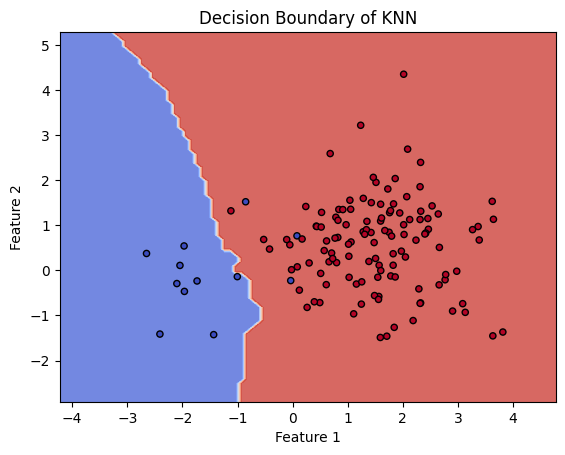

In [47]:
import numpy as np #NumPy = Numerical Python: used for array operations, linear algebra, statistics, random number generation
import matplotlib.pyplot as plt #used for plotting data, interactive features, and data visualization
#sklearn or scikit-learn is used for ML algorithms, data preprocessing, model selection and evaluation, feature selection and extraction, ensemble methods
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split #train_test_split, metrics, and datasets = all for model training, evaluation, etc.
from sklearn import metrics
from sklearn import datasets
import pandas as pd # pandas is used for adata manipulation

# Generate toy imbalanced dataset from sklearn
# make_blobs is useful for creating multiclass datasets by making Gaussian blobs for clustering
# n_samples = [15,  150] means that there are two classes with 15 and 150 samples respectively...
# Therefore, 15 + 150 = 165 samples -> 165 datapoints is the answer for 1a
# n_features = 2 -> 2 features is the answer for 1b
Xdat,ydat = datasets.make_blobs(n_samples=[15, 150], centers=[[-1.5,0],[1.5,0.5]], cluster_std=[1,1], n_features=2, random_state=42)
print('(a) % (b): Total number of datapoints, number of features: ')

# YOUR CODE for (a), (b), and (c)

#(a) & (b) # of datapoints, # of features___________________________________________
#the .shape attribute is a property of NumPy arrays that gives the dimensions of the array
# e.g.: array = np.array([1,2,3], [4,5,6])
# print(array.shape) # output: (2, 3)
print(f"{Xdat.shape[0]}, {Xdat.shape[1]}\n")

#(c) checking if there is similar numerical range across the different features/variables
# When features have similar numerical ranges, it implies 
# that their values lie within comparable lower and upper limits
print("(c):")
print(f'Feature 0 min: {Xdat[:,0].min():.5f}, max: {Xdat[:,0].max():.5f}, Therefore: Range Size = {(Xdat[:,0].max() - Xdat[:,0].min()):.5f}')
print(f'Feature 1 min: {Xdat[:,1].min():.5f}, max: {Xdat[:,1].max():.5f}, Therefore: Range Size = {(Xdat[:,1].max() - Xdat[:,1].min()):.5f}\n')
#--------------------------------------------------------------------------------------

# Make a 80%-20% train/test split
# Xdat and ydat are data features and labels, respectively
randomseed = 42 # changed to 43 from the original 42 for 1g, then changed back to 42
X_train, X_test, y_train, y_test = train_test_split(Xdat,ydat,test_size=0.2,random_state=randomseed)

# YOUR CODE for (d)_________________________________________________________
# Percentage of class 1 in the training dataset
class1_training = np.sum(1 == y_train)/len(y_train) * 100
print(f'(d): Percent of training data is in class 1: {class1_training:.2f}%\n')
#----------------------------------------------------------------------------

# Train logistic regression model (with default regularization) for binary classification
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print('(e): Test accuracy: '+str(round(100*test_accuracy,2)))

# YOUR CODE for (h) (optional bonus)___________________________________
# Create a mesh to plot in
x_min, x_max = Xdat[:, 0].min() - 1, Xdat[:, 0].max() + 1
y_min, y_max = Xdat[:, 1].min() - 1, Xdat[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict each point on the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Generate the plot
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary of KNN")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
#----------------------------------------------------------------------


## 2) Standardization [15 pts]
Goal: Perform the tranformation on validation and test sets in a right way.
The following code shows two ways to standardize validation and test sets (here is only shown on a test set).
- 1- Run the following code to see the values of X_test_std1 and X_test_std2
- 2- Re-apply standardization using StandrdScaler from scikit-learn
- 3- Assuming the StandardScaler result is the correct transformation, is the following statement correct? [Your answer]
- "We should re-use the parameters estimated from the training set to transfrom validation and test sets" 

**Note: The standard deviation differs between numpy and pandas. Pandas uses N-1 in the denominator whereas numpy by default does not (sample vs population standard deviation).  We must use numpy std in this assignment since StandardScaler uses numpy std for scaling. Thefore, you should use `df.std(axis=0, ddof=0)` or `df.values.std(axis=0)` to calculate standard deviation for purpose of scaling.**

In [50]:
import pandas as pd

X_train = pd.DataFrame([10 ,20, 30])
X_test = pd.DataFrame([5,6,7])

mu_train, sigma_train = X_train.mean(axis=0), X_train.values.std(axis=0)
mu_test, sigma_test = X_test.mean(axis=0), X_test.values.std(axis=0)

X_train_std = (X_train - mu_train) / sigma_train
X_test_std1 = (X_test - mu_test) / sigma_test
X_test_std2 = (X_test - mu_train) / sigma_train
print(X_test_std1)
print('\n')
print(X_test_std2)

          0
0 -1.224745
1  0.000000
2  1.224745


          0
0 -1.837117
1 -1.714643
2 -1.592168


In [51]:
# YOUR CODE for step 2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler to the training data only

# Apply the scaler to the test data
X_test_std = scaler.transform(X_test)

print("\nStandardScaler applied to X_test:")
print(X_test_std)


StandardScaler applied to X_test:
[[-1.83711731]
 [-1.71464282]
 [-1.59216833]]


## 3) Missing data [20 pts]
Goal: Try a new data imputation strategy and encourage using scikit-learn documentation

- 1- Create a dataframe same as the one in the lecture 18, slide #52 with coding.
- 2- Examine its shape and dimensions
- 3- Print it to make sure that is what you expect
- 4- Use SimpleImputer to impute missing values with constant value equal to -1
(Hint: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [52]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# YOUR CODE for part 1, 2, and 3

# Step 1: Create the DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, 2, 3, np.nan, 5],
    'D': [1, np.nan, np.nan, 4, 5]
}
df = pd.DataFrame(data)

# Step 2: Examine its shape and dimensions
print("Shape of DataFrame:", df.shape)
print("Dimensions of DataFrame:", df.ndim)

# Step 3: Print the DataFrame
print("Initial DataFrame:")
print(df)

# YOUR CODE for part 4
# Step 4: Use SimpleImputer to impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=-1)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)  # Convert back to DataFrame

# Print the DataFrame after imputation
print("DataFrame after Imputation:")
print(df_imputed)



Shape of DataFrame: (5, 4)
Dimensions of DataFrame: 2
Initial DataFrame:
     A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  2.0  NaN
2  NaN  3.0  3.0  NaN
3  4.0  4.0  NaN  4.0
4  5.0  5.0  5.0  5.0
DataFrame after Imputation:
     A    B    C    D
0  1.0 -1.0  1.0  1.0
1  2.0  2.0  2.0 -1.0
2 -1.0  3.0  3.0 -1.0
3  4.0  4.0 -1.0  4.0
4  5.0  5.0  5.0  5.0


## 4) Receiver Operater Characteristic (ROC) [30 pts]
In this section, you need to plot ROC curve and calculate the corresponding AUC. You are given a matrix of probabilities (`y_probabilities`) where a value in the first and second columns refers to probability that a corresponding data point belongs to class 0 and 1, respectively. 

Suppose that the positive label is 1 (`pos_label=1`). Therefore, if `y_probabilities` is 

```
[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]
 [0.74306586 0.25693414]
```
 
then, the `y_score` array, which is an input of plot_roc_curve function, is expected to be 

`y_score = [0.5599..., 0.3097..., 0.6818..., 0.4304..., ...]`


---

1- Complete the `"#YOUR CODE"` sections at plot_roc_curve function to plot the ROC curve 

2- Explain what AUC is and calculate it using auc function in sklearn. [Your answer]

In [67]:
# RUN THIS CELL, BUT DO NOT MODIFY 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target
X, y = X[:100, [1]], y[:100]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0, stratify=y)

model = LogisticRegression(solver='lbfgs', random_state=123)
model.fit(X_train, y_train)

y_probabilities = model.predict_proba(X_test)

print(y_probabilities[:10])

[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]]


In [68]:
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=200):

    y_true_arr = np.array(y_true)
    y_score_arr = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives

    for threshold in thresholds:
        
        # Create a vector which its value is 1, if y_score >= threshold, otherwise its value is 0
        binarized_scores = np.where(y_score >= threshold, pos_label, int(not pos_label))        
        positive_predictions = (binarized_scores == pos_label)
        
      
        true_positives = np.sum((positive_predictions == 1) & (y_true_arr == pos_label)) # YOUR CODE
        false_positives = np.sum((positive_predictions == 1) & (y_true_arr != pos_label)) # YOUR CODE
        
        x_axis_values.append(false_positives / float(num_negatives))
        y_axis_values.append(true_positives / float(num_positives))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


    
    return None

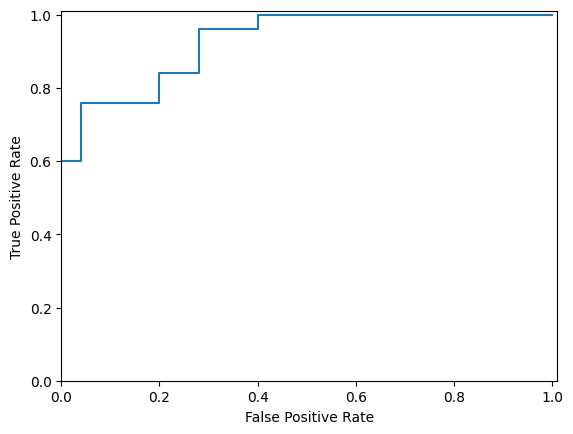

In [69]:
# RUN THIS CELL, BUT DO NOT MODIFY 

plot_roc_curve(y_test, y_probabilities[:, 1], pos_label=1)
plt.show()

In [70]:
# Calculate AUC using sklearn
from sklearn import metrics

# YOUR CODE
# Assuming 'y_test' and 'y_probabilities' are defined and correct from previous setup
y_score = y_probabilities[:, 1]  # probability estimates for the positive class
auc_score = metrics.roc_auc_score(y_test, y_score)
print("AUC Score:", auc_score)

AUC Score: 0.9047999999999999
